## Homework: Block 4_ Due May 30th

## Group G= Andrea Lorenzon, Natalia Slipchuk, Tomasso Rodani. 

### DAAG
# Chapter 6

# Exercise  6

The following investigates the consequences of not using a logarithmic transformation for the nihills data analysis. The second differs from the first in having a dist x climb interaction term, additional to linear terms in dist and climb.

In [67]:
# libraries used:

library(DAAG)       #required by most exercises
library(psych)      # pairs.panels(), a neat pairplot for EDA
library(car)        # car::vif(), for exercise 6.7
library(MASS)       # lm.ridge()
library(broom)      # glance(), quick vision of a model
library(ggplot2)    # graphics
library(simpleboot) # bootstrapping linear models for ex 6.8
library(plot3D)     # lovely 3D graph in ex 6.8
library(boot)       # bootstrapping
library(lmridge)    # alternative ridge regression library
library(MPV)        # ex. 10
library(lattice)    # ex. 2

- (a) Fit the two models:

    nihills.lm <- lm(time ˜ dist+climb, data=nihills)
    nihills2.lm <- lm(time ˜ dist+climb+dist:climb, data=nihills)
    anova(nihills.lm, nihills2.lm)

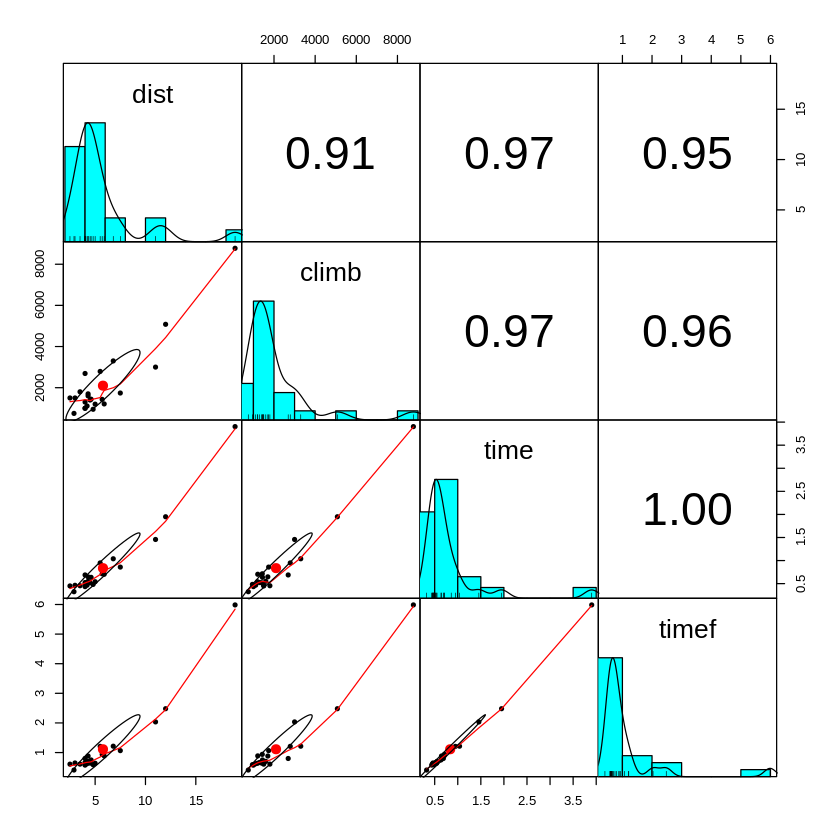

In [2]:
pairs.panels(nihills, gap=0)

In [3]:
summary(nihills)

      dist            climb           time            timef       
 Min.   : 2.500   Min.   : 750   Min.   :0.3247   Min.   :0.4092  
 1st Qu.: 4.000   1st Qu.:1205   1st Qu.:0.4692   1st Qu.:0.6158  
 Median : 4.500   Median :1500   Median :0.5506   Median :0.7017  
 Mean   : 5.778   Mean   :2098   Mean   :0.8358   Mean   :1.1107  
 3rd Qu.: 5.800   3rd Qu.:2245   3rd Qu.:0.7857   3rd Qu.:1.0014  
 Max.   :18.900   Max.   :8775   Max.   :3.9028   Max.   :5.9856  

In [4]:
nihills.lm  <- lm(time ~ dist+climb           , data=nihills)
nihills2.lm <- lm(time ~ dist+climb+dist:climb, data=nihills)

In [5]:
summary(nihills.lm)


Call:
lm(formula = time ~ dist + climb, data = nihills)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19857 -0.04824  0.01701  0.05539  0.21083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.286e-01  4.025e-02  -5.679 1.47e-05 ***
dist         1.008e-01  1.382e-02   7.293 4.72e-07 ***
climb        2.298e-04  2.893e-05   7.941 1.31e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0973 on 20 degrees of freedom
Multiple R-squared:  0.9852,	Adjusted R-squared:  0.9838 
F-statistic: 667.6 on 2 and 20 DF,  p-value: < 2.2e-16


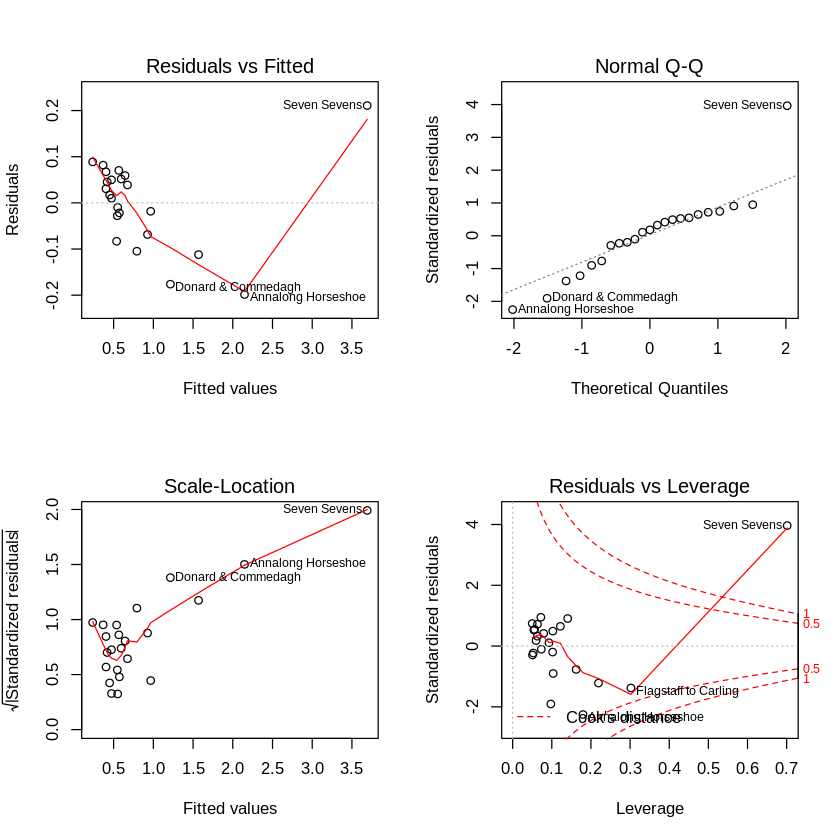

In [6]:
par(mfrow=c(2,2))
plot(nihills.lm)

In [7]:
summary(nihills2.lm)


Call:
lm(formula = time ~ dist + climb + dist:climb, data = nihills)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07854 -0.03182 -0.01334  0.02894  0.08711 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.677e-02  3.744e-02   1.249   0.2267    
dist        6.962e-02  7.427e-03   9.374 1.48e-08 ***
climb       9.988e-05  2.040e-05   4.896   0.0001 ***
dist:climb  9.964e-06  1.171e-06   8.509 6.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04552 on 19 degrees of freedom
Multiple R-squared:  0.9969,	Adjusted R-squared:  0.9964 
F-statistic:  2058 on 3 and 19 DF,  p-value: < 2.2e-16


Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

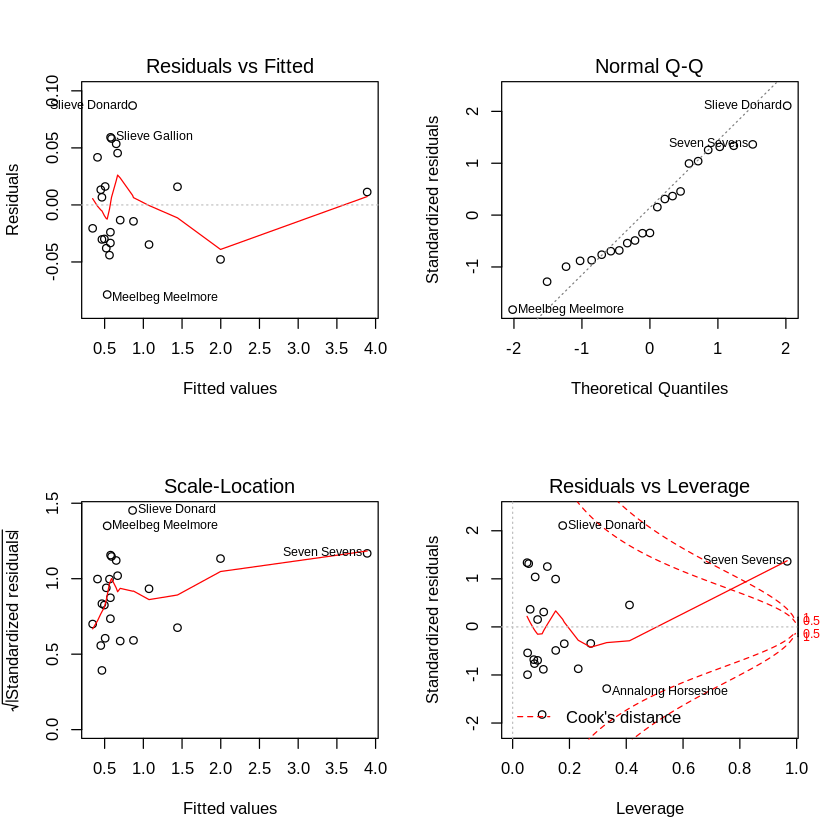

In [8]:
par(mfrow=c(2,2))
plot(nihills2.lm)

In [9]:
anova(nihills.lm, nihills2.lm)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
20,0.18936094,NA,NA,NA,NA
19,0.03936124,1,0.1499997,72.4061,6.623143e-08


<b>Commentary:</b>

Including outsider values, the model

- (b) Using the F-test result, make a tentative choice of model, and proceed to examine diagnostic plots. Are there any problematic observations? What happens if these points are removed? Refit both of the above models, and check the diagnostics again

[1] "Outsiders:"


,dist,climb,time,timef
Annalong Horseshoe,12.0,5080,1.949167,2.480556
Flagstaff to Carling,11.0,3000,1.456944,2.034444
Seven Sevens,18.9,8775,3.902778,5.985556


[1] "Dataset - outsiders:"


,dist,climb,time,timef
Binevenagh,7.5,1740,0.8583333,1.0644444
Slieve Gullion,4.2,1110,0.4666667,0.6230556
Glenariff Mountain,5.9,1210,0.7030556,0.8869444
Donard & Commedagh,6.8,3300,1.0386111,1.2141667
McVeigh Classic,5.0,1200,0.5411111,0.6375000
Tollymore Mountain,4.8,950,0.4833333,0.5886111
Slieve Martin,4.3,1600,0.5505556,0.7016667
Moughanmore,3.0,1500,0.4636111,0.6475000
Hen & Cock,2.5,1500,0.4497222,0.6075000
Monument Race,4.0,1000,0.4716667,0.5947222


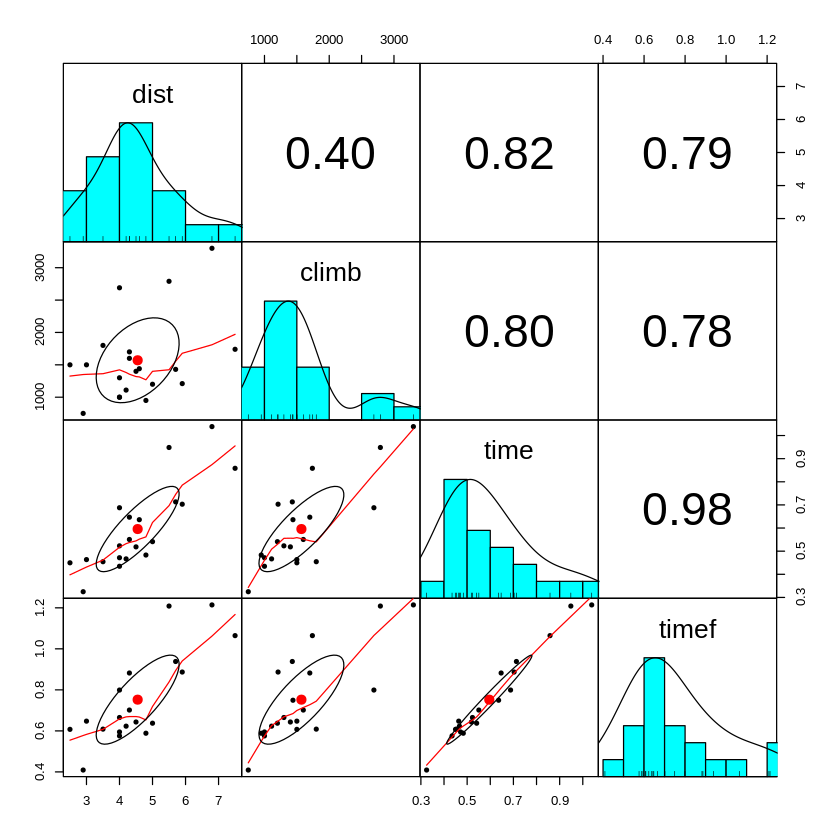

In [10]:
outsiders = nihills[c(10,17,19),]
print("Outsiders:")
outsiders
nihills.clean = nihills[-c(10,17,19),]
print("Dataset - outsiders:")
nihills.clean
pairs.panels(nihills.clean, gap=0)

In [11]:
nihills.clean.lm  <- lm(time ~ dist+climb           , data=nihills.clean)
nihills2.clean.lm <- lm(time ~ dist+climb+dist:climb, data=nihills.clean)

In [12]:
summary(nihills.clean.lm)


Call:
lm(formula = time ~ dist + climb, data = nihills.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085066 -0.030909 -0.008891  0.040014  0.075740 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.407e-02  4.040e-02  -1.338    0.198    
dist         8.815e-02  9.009e-03   9.785 2.13e-08 ***
climb        1.584e-04  1.726e-05   9.177 5.37e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04524 on 17 degrees of freedom
Multiple R-squared:  0.9462,	Adjusted R-squared:  0.9399 
F-statistic: 149.4 on 2 and 17 DF,  p-value: 1.632e-11


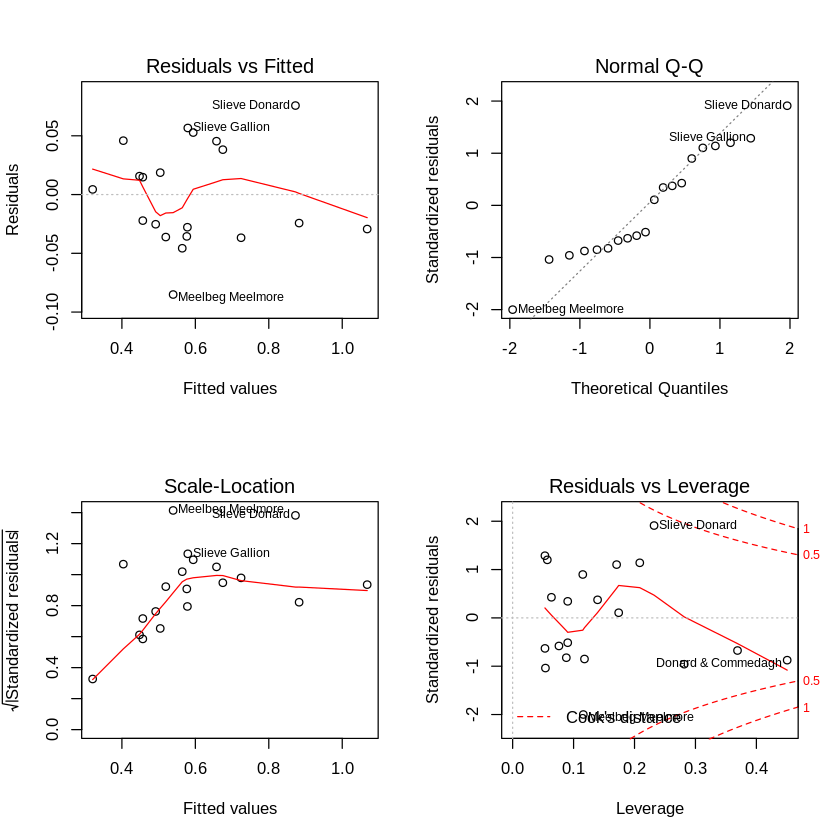

In [13]:
par(mfrow=c(2,2))
plot(nihills.clean.lm)

In [14]:
summary(nihills2.clean.lm)


Call:
lm(formula = time ~ dist + climb + dist:climb, data = nihills.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.085241 -0.030444 -0.008553  0.039843  0.075714 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.662e-02  1.187e-01  -0.477  0.63970   
dist         8.866e-02  2.413e-02   3.674  0.00205 **
climb        1.599e-04  7.103e-05   2.252  0.03874 * 
dist:climb  -3.016e-07  1.317e-05  -0.023  0.98201   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04663 on 16 degrees of freedom
Multiple R-squared:  0.9462,	Adjusted R-squared:  0.9361 
F-statistic: 93.77 on 3 and 16 DF,  p-value: 2.292e-10


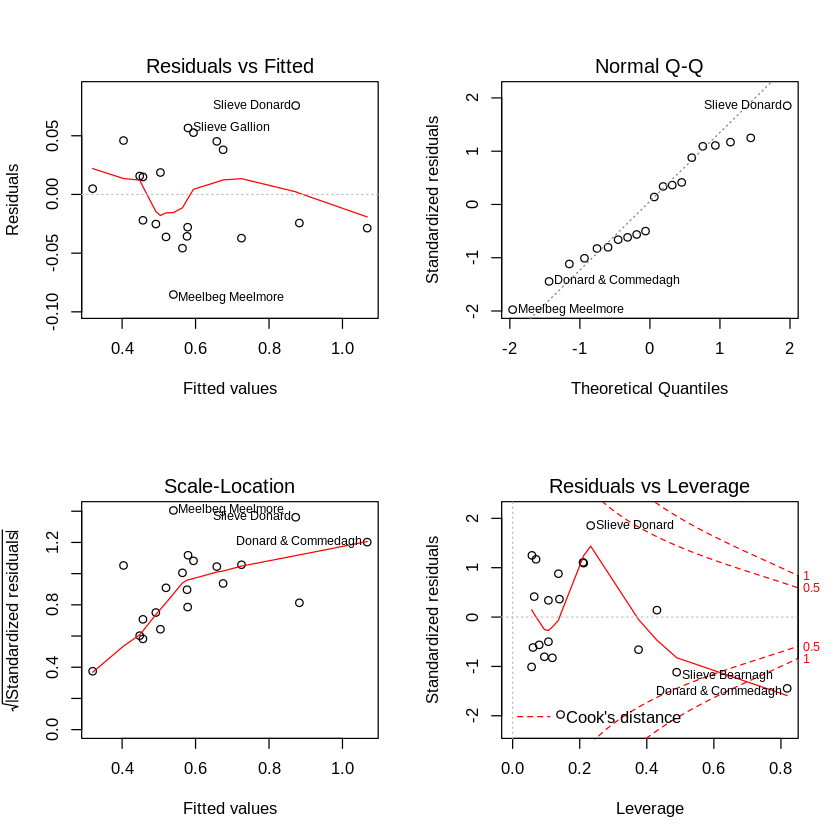

In [15]:
par(mfrow=c(2,2))
plot(nihills2.clean.lm)

In [16]:
anova(nihills.clean.lm, nihills2.clean.lm)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,0.03479176,NA,NA,NA,NA
16,0.03479062,1,1.140574e-06,0.000524543,0.9820109


<b>Conclusions:</b>
Removing just 3 data points, the F-ratio decreases to a non-significant value, with a non-significant p-value. Removing high-leverage points revealed the lower level of correlation between the variables, as seen in the pairplot.

This high leverage could be solved by taking the logarithm of the variables, thus reducing the extreme leverage and Cook's distance that can be observed in the QQ-plot and residual plot of the first linear model.

As extra work, the log transform is applied here, showing an improvement even without removing outsiders:

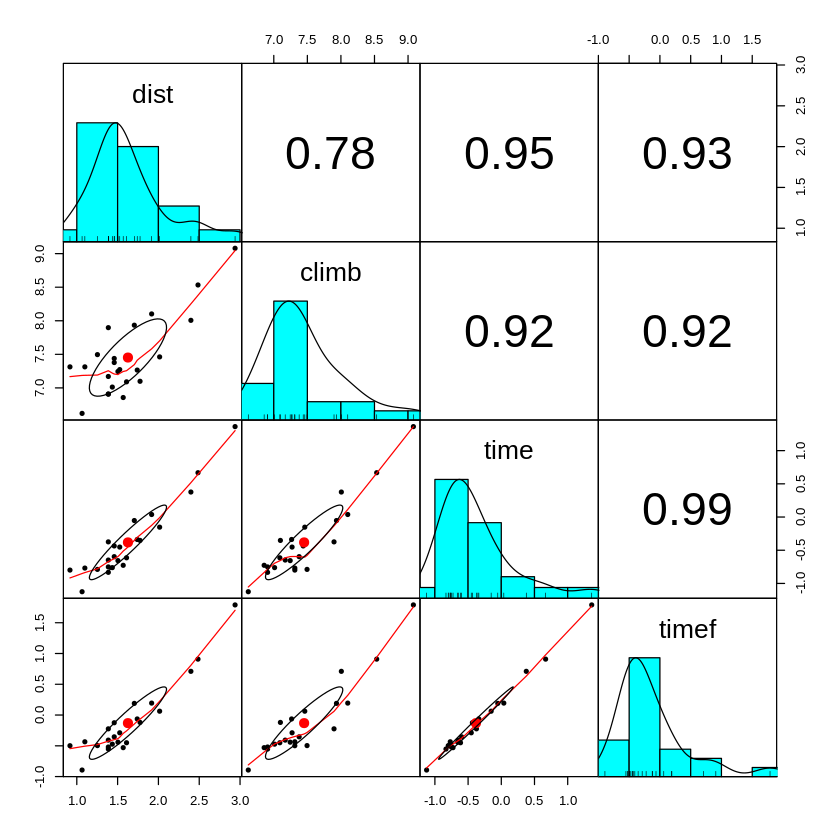

In [17]:
pairs.panels(log(nihills), gap=0)

In [18]:
nihills.log.lm <- lm(log(time) ~ log(dist)+log(climb)           , data=nihills.clean)

In [19]:
summary(nihills.log.lm)


Call:
lm(formula = log(time) ~ log(dist) + log(climb), data = nihills.clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.173486 -0.047388 -0.009307  0.065425  0.113188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.71238    0.34848 -13.523 1.59e-10 ***
log(dist)    0.64529    0.06924   9.319 4.31e-08 ***
log(climb)   0.43877    0.05100   8.603 1.34e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07733 on 17 degrees of freedom
Multiple R-squared:  0.9368,	Adjusted R-squared:  0.9293 
F-statistic: 125.9 on 2 and 17 DF,  p-value: 6.426e-11


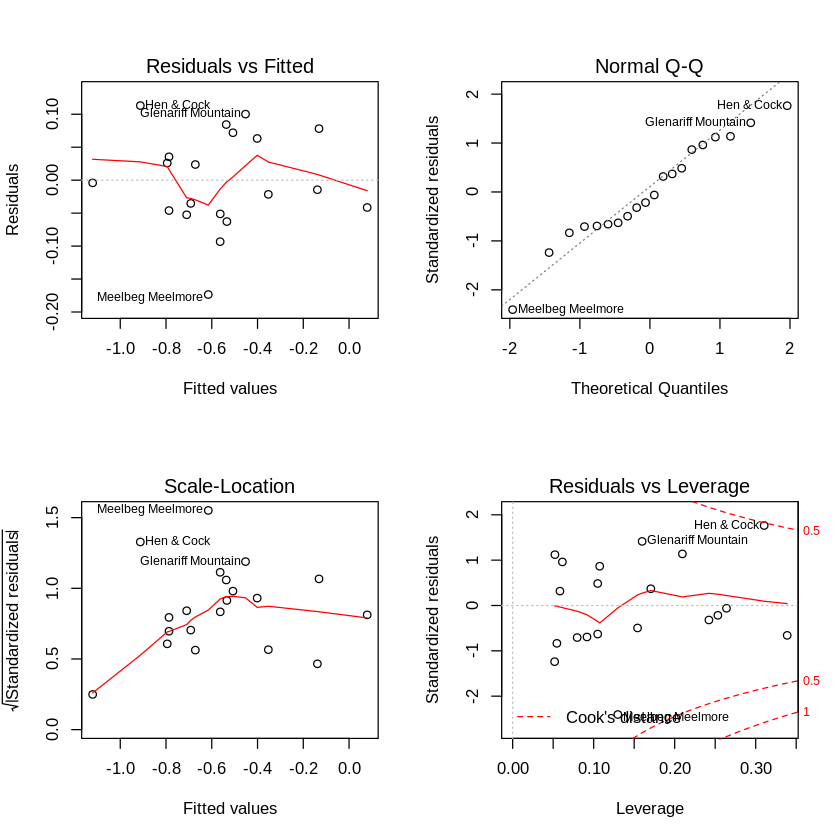

In [20]:
par(mfrow=c(2,2))
plot(nihills.log.lm)

#### Exercise  7

Check the variance inflation factors for ```bodywt``` and ```lsize``` for the model ```brainwt ~ bodywt + lsize```, fitted to the litters data set. Comment.

In [21]:
litters

lsize,bodywt,brainwt
3,9.447,0.444
3,9.780,0.436
4,9.155,0.417
4,9.613,0.429
5,8.850,0.425
5,9.610,0.434
6,8.298,0.404
6,8.543,0.439
7,7.400,0.409
7,8.335,0.429


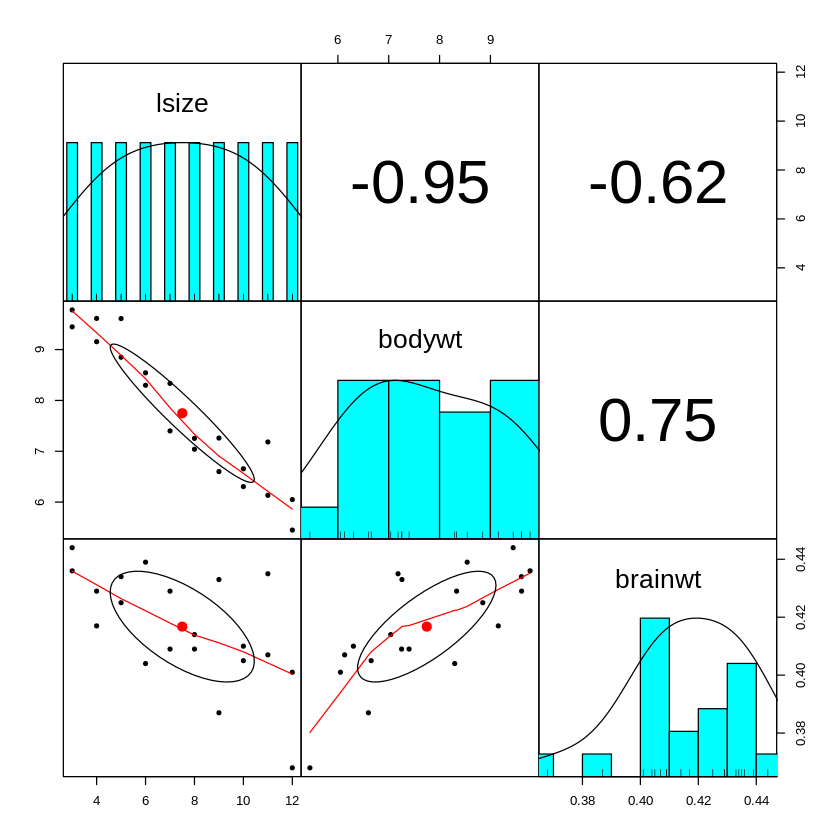

In [22]:
pairs.panels(litters, gap=0)

In [23]:
lit.lm <- lm(brainwt ~ bodywt + lsize, data=litters)

In [24]:
summary(lit.lm)


Call:
lm(formula = brainwt ~ bodywt + lsize, data = litters)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0230005 -0.0098821  0.0004512  0.0092036  0.0180760 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.178247   0.075323   2.366  0.03010 * 
bodywt      0.024306   0.006779   3.586  0.00228 **
lsize       0.006690   0.003132   2.136  0.04751 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01195 on 17 degrees of freedom
Multiple R-squared:  0.6505,	Adjusted R-squared:  0.6094 
F-statistic: 15.82 on 2 and 17 DF,  p-value: 0.0001315


In [25]:

car::vif(lit.lm)

bodywt    lsize 
11.32982 11.32982

<b>Commentary:</b>

The very high value of Variance Inflation Factor of the variables confirms the high collinearity observed in the pairplot, and so we should expect problems from our linear model.

In [26]:
lit2.lm <- lm(brainwt ~ bodywt, data=litters)

In [27]:
summary(lit2.lm)


Call:
lm(formula = brainwt ~ bodywt, data = litters)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024666 -0.004901 -0.001171  0.007475  0.024171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.335548   0.017327  19.366 1.68e-13 ***
bodywt      0.010480   0.002204   4.755 0.000158 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01308 on 18 degrees of freedom
Multiple R-squared:  0.5567,	Adjusted R-squared:  0.5321 
F-statistic: 22.61 on 1 and 18 DF,  p-value: 0.0001583


As a proof, as we can see, removing one of the two variables doesn't affect much our model adjusted R-squared value.

# Exercise  8

Apply the ```lm.ridge()``` function to the litters data, using the generalized cross-validation (GCV) criterion to choose the tuning parameter. (GCV is an approximation to cross-validation.)

- (a) In particular, estimate the coefficients of the model relating brainwt to ```bodywt``` and ```lsize``` and compare with the results obtained using ```lm()```.

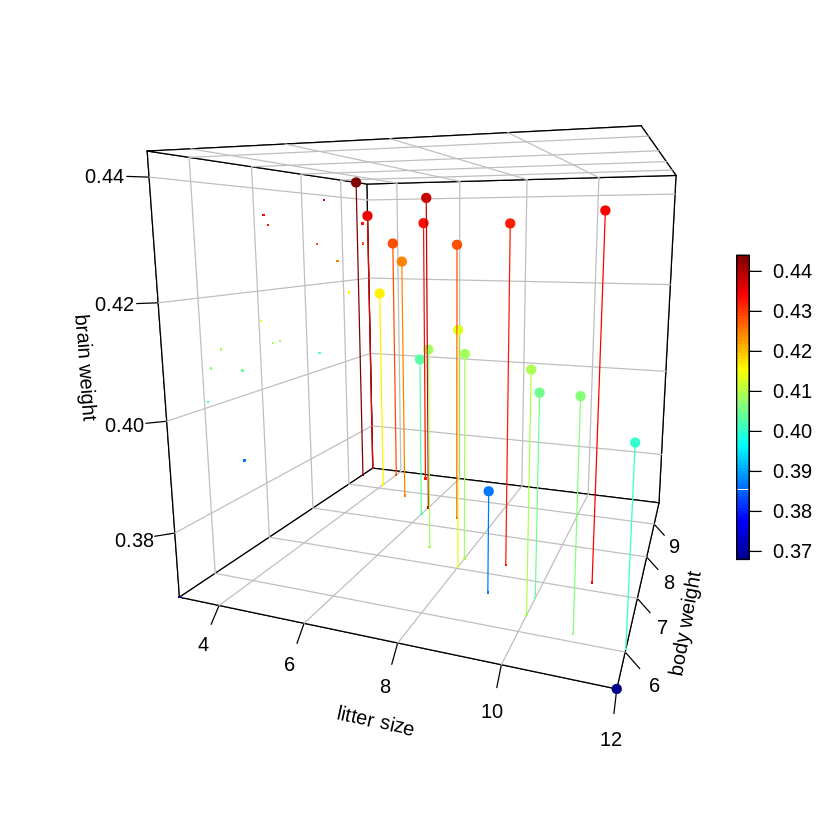

In [28]:
# plot litters in 3D
# because of its beauty, shamelessly taken from:
# http://www.sthda.com/english/wiki/impressive-package-for-3d-and-4d-graph-r-software-and-data-visualization

scatter3D_fancy <- function(x, y, z,..., colvar = z)
  {
   panelfirst <- function(pmat) {
      XY <- trans3D(x, y, z = rep(min(z), length(z)), pmat = pmat)
      scatter2D(XY$x, XY$y, colvar = colvar, pch = ".", 
              cex = 2, add = TRUE, colkey = FALSE)
   
      XY <- trans3D(x = rep(min(x), length(x)), y, z, pmat = pmat)
      scatter2D(XY$x, XY$y, colvar = colvar, pch = ".", 
              cex = 2, add = TRUE, colkey = FALSE)
  }
  scatter3D(x, y, z, ..., colvar = colvar, panel.first=panelfirst,
    colkey = list(length = 0.5, width = 0.5, cex.clab = 0.75)) 
}

scatter3D_fancy(litters$lsize, litters$bodywt, litters$brainwt, pch=19, bty="b2", type="h",
         ticktype = "detailed", theta = 20, phi = 10, xlab = "litter size",
          ylab ="body weight", zlab = "brain weight")

In [29]:
#find optimal lambda for ridge regression:

l = seq (0.001, 100, 0.001)
ridgefit.search <- lm.ridge(brainwt ~ . , data=litters, lambda = l)
select(ridgefit.search)

modified HKB estimator is 0 
modified L-W estimator is 0 
smallest value of GCV  at 0.118 


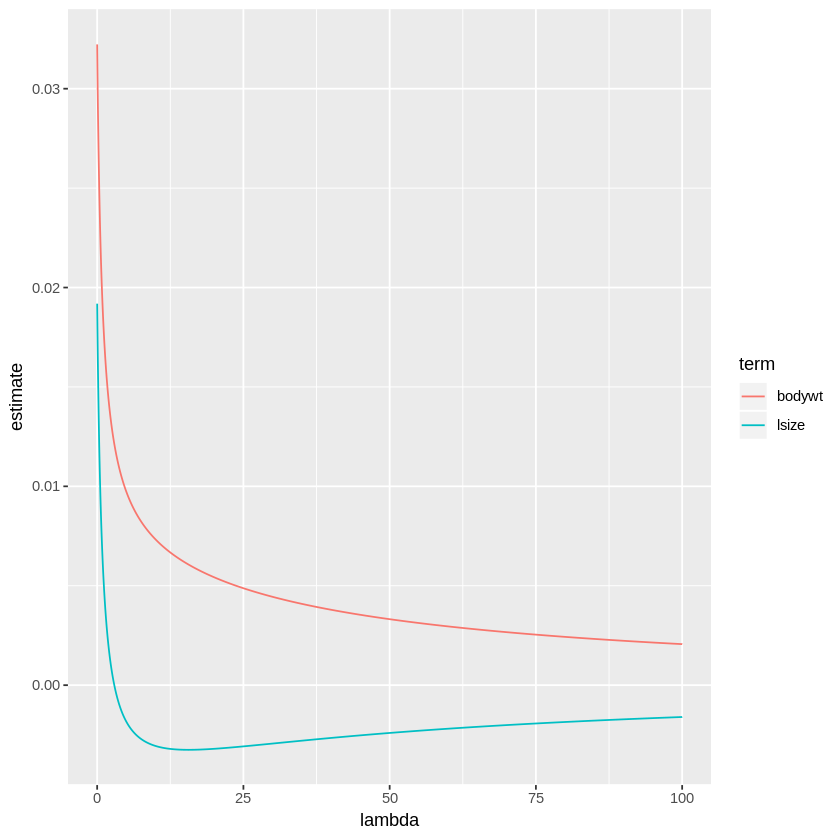

In [30]:
#plot the effect on lambda on ridge regression parameters

ggplot(tidy(ridgefit.search), aes(lambda, estimate, color = term)) + geom_line()

Warning message:
“Removed 180000 rows containing missing values (geom_path).”

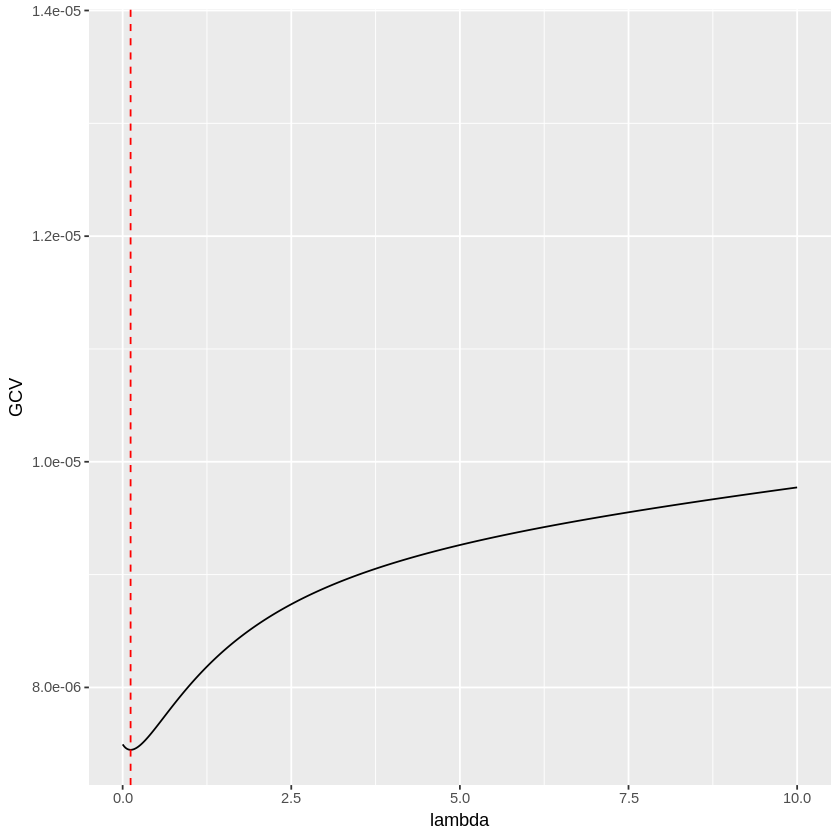

In [31]:
# plot of GCV versus lambda
ggplot(tidy(ridgefit.search), aes(lambda, GCV)) + xlim(0,10) + geom_line() + geom_vline(xintercept = 0.118, col = "red", lty = 2)

In [32]:
# use best lambda to optimize parameters:

ridgefit <- lm.ridge(brainwt ~ ., data=litters, lambda = 0.118)
glance(ridgefit)

kHKB,kLW,lambdaGCV
0,0,0.118


- (b_1) Using both ridge and ordinary regression, estimate the mean brain weight when litter size is 10 and body weight is 7. 

In [33]:
#lm.ridge does not appear to have a predict method, so we need to compute it by hand:

test <- c(10,7)

pred.ridge <- coef(ridgefit)[1] + coef(ridgefit)[2]*test[1] + coef(ridgefit)[3]*test[2]
print ("Predicted lm.ridge weight for litter size = 10, body weight= 7 is: ")
print (pred.ridge)

[1] "Predicted lm.ridge weight for litter size = 10, body weight= 7 is: "
          
0.4144103 


In [34]:
lmfit <- lm(brainwt ~ lsize + bodywt, data=litters)
coef(lmfit)
test = data.frame(lsize = 10, bodywt = 7)
print ("Predicted lm weight for litter size = 10, body weight= 7 is: ")
print (predict(lmfit, newdata = test))

(Intercept)       lsize      bodywt 
0.178246962 0.006690331 0.024306344

[1] "Predicted lm weight for litter size = 10, body weight= 7 is: "
        1 
0.4152947 


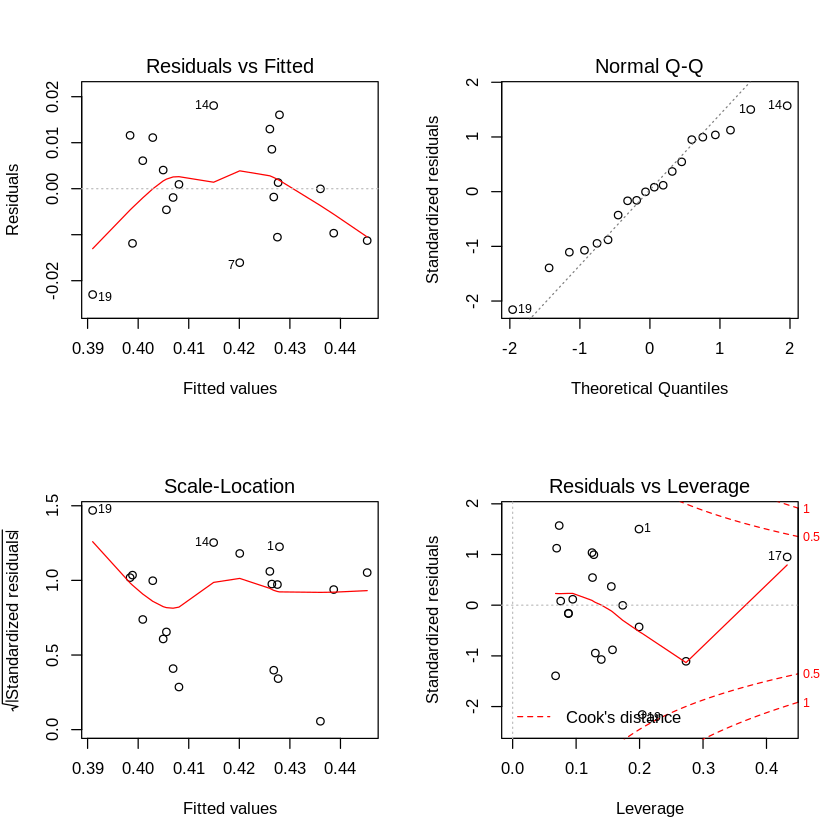

In [35]:
par(mfrow=c(2,2))
plot(lmfit)

Residuals plot for the linear model suggests a non strictly linear regression. Given the requirements of the assignment, the model will be left untouched, but the issue has been noted.

- (b_2) Use the bootstrap, with case-resampling, to compute approximate 95% percentile confidence intervals using each method. Compare with the interval obtained using ```predict.lm()```.

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 3000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.4049,  0.4229 )  
Calculations and Intervals on Original Scale


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = litters, statistic = rsq, R = 3000, formula = brainwt ~ 
    .)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.4152947 5.077315e-05 0.004434242

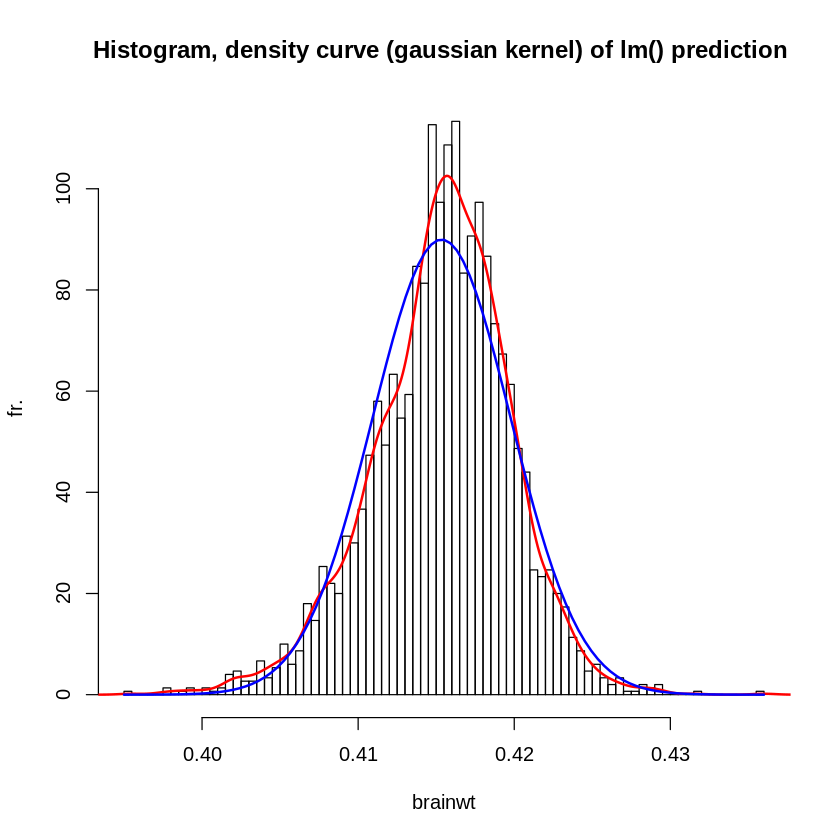

In [36]:
#predicting by bootstrap on lm()

rsq <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample
  fit <- lm(formula, data=d)
  return(predict(fit, newdata = test))
}
# bootstrapping with 1000 replications
results <- boot(data=litters, statistic=rsq,   R=3000, formula=brainwt~.)

# get 95% confidence interval
boot.ci(results, type="bca")

# view results
results
hist(results$t,breaks = 100,freq=F,main="Histogram, density curve (gaussian kernel) of lm() prediction ",xlab="brainwt",ylab="fr.")
lines(density(results$t), col="red", lwd=2) 
curve(dnorm(x, mean = mean(results$t), sd = sd(results$t)), add=TRUE, col="blue",lwd=2)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = litters, statistic = rsq, R = 3000, formula = brainwt ~ 
    .)


Bootstrap Statistics :
    original       bias    std. error
t1*  0.41013 0.0001488067 0.004626962

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 3000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.4007,  0.4186 )  
Calculations and Intervals on Original Scale


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = litters, statistic = rsq, R = 3000, formula = brainwt ~ 
    .)


Bootstrap Statistics :
    original       bias    std. error
t1*  0.41013 0.0001488067 0.004626962

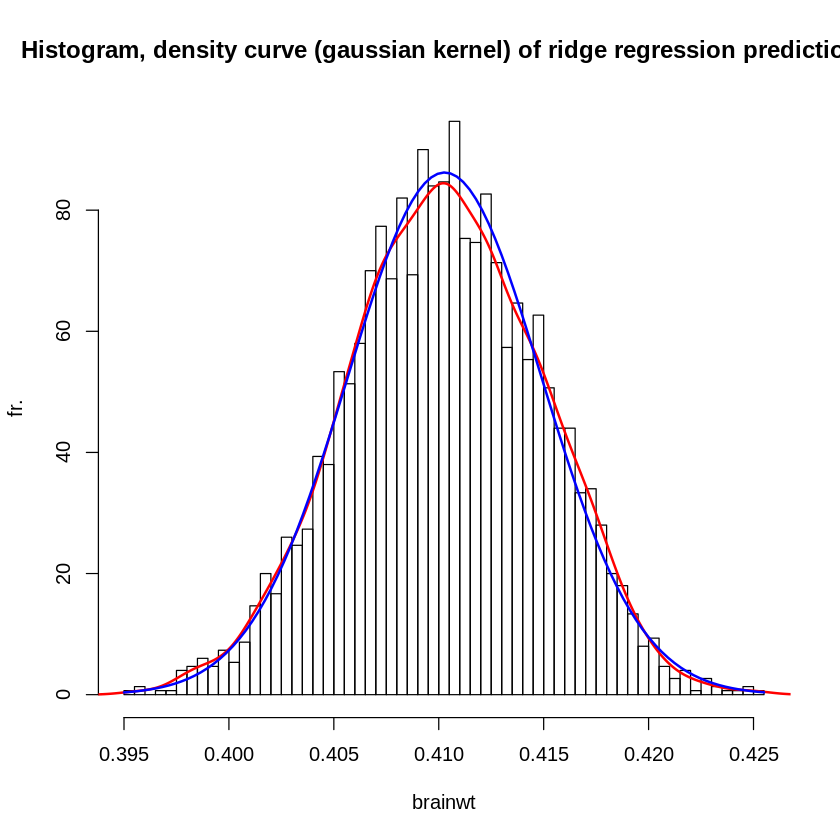

In [37]:
#predicting by bootstrap on lm()

rsq <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample
  ridgefit <- lmridge(formula, data=d, K = 0.118)
  return(coef(ridgefit)[1] + coef(ridgefit)[2]*test$lsize + coef(ridgefit)[3]*test$bodywt)
}
# bootstrapping with 1000 replications
results <- boot(data=litters, statistic=rsq, R=3000, formula=brainwt~.)

# view results
results

# get 95% confidence interval
boot.ci(results, type="bca")

# view results
results
hist(results$t,breaks = 100, freq=F,main="Histogram, density curve (gaussian kernel) of ridge regression prediction ",xlab="brainwt",ylab="fr.")
lines(density(results$t), col="red", lwd=2) 
curve(dnorm(x, mean = mean(results$t), sd = sd(results$t)), add=TRUE, col="blue",lwd=2)

Bootstrapping gives a better normality for ridge regression than linear models. In some repetitions, `lm()`'s predictions are slightly right-skewed, for unknown reasons.

We have something to take into consideration when computing the CI of ridge regression parameters.

A relevant quote from Jelle Goeman states:

_"It is a very natural question to ask for standard errors of regression coefficients or other estimated quantities. In principle such standard errors can easily be calculated, e.g. using the bootstrap. Still, this package deliberately does not provide them. The reason for this is that standard errors are not very meaningful for strongly biased estimates such as arise from penalized estimation methods. Penalized estimation is a procedure that reduces the variance of estimators by introducing substantial bias. The bias of each estimator is therefore a major component of its mean squared error, whereas its variance may contribute only a small part. Unfortunately, in most applications of penalized regression it is impossible to obtain a suciently precise estimate of the bias. Any bootstrap-based calculations can only give an assessment of the variance of the estimates. Reliable estimates of the bias are only available if reliable unbiased estimates are available, which is typically not the case in situations in which penalized estimates are used. Reporting a standard error of a penalized estimate therefore tells only part of the story. It can give a mistaken impression of great precision, completely ignoring the inaccuracy caused by the bias. It is certainly a mistake to make con fidence statements that are only based on an assessment of the variance of the estimates, such as bootstrap-based confidence intervals do."

# Exercise  10

The data frame ```table.b3``` in the MPV package contains data on gas mileage and 11 other variables for a sample of 32 automobiles.

In [38]:

head(table.b3)

y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
18.90,350,165,260,8.00,2.56,4,3,200.3,69.9,3910,1
17.00,350,170,275,8.50,2.56,4,3,199.6,72.9,3860,1
20.00,250,105,185,8.25,2.73,1,3,196.7,72.2,3510,1
18.25,351,143,255,8.00,3.00,2,3,199.9,74.0,3890,1
20.07,225,95,170,8.40,2.76,1,3,194.1,71.8,3365,0
11.20,440,215,330,8.20,2.88,4,3,184.5,69.0,4215,1


- (a) Construct a scatterplot of y (mpg) versus x1 (displacement). Is the relationship between these variables non-linear?

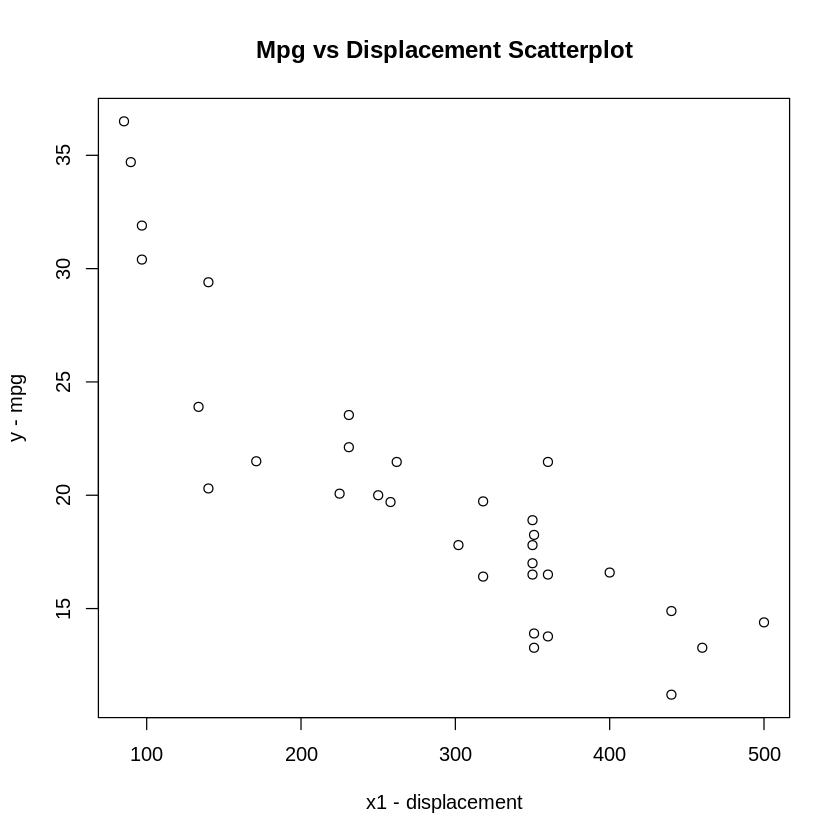

In [39]:
plot(y ~ x1, data=table.b3,xlab='x1 - displacement', ylab='y - mpg', main="Mpg vs Displacement Scatterplot")

The plot above represents a non-linear pattern; it shows a negative curvilinear relationship between mpg and the displacement variables.  

- (b) Use the ```xyplot()``` function, and x11 (type of transmission) as a group variable. Is a linear model reasonable for these data?

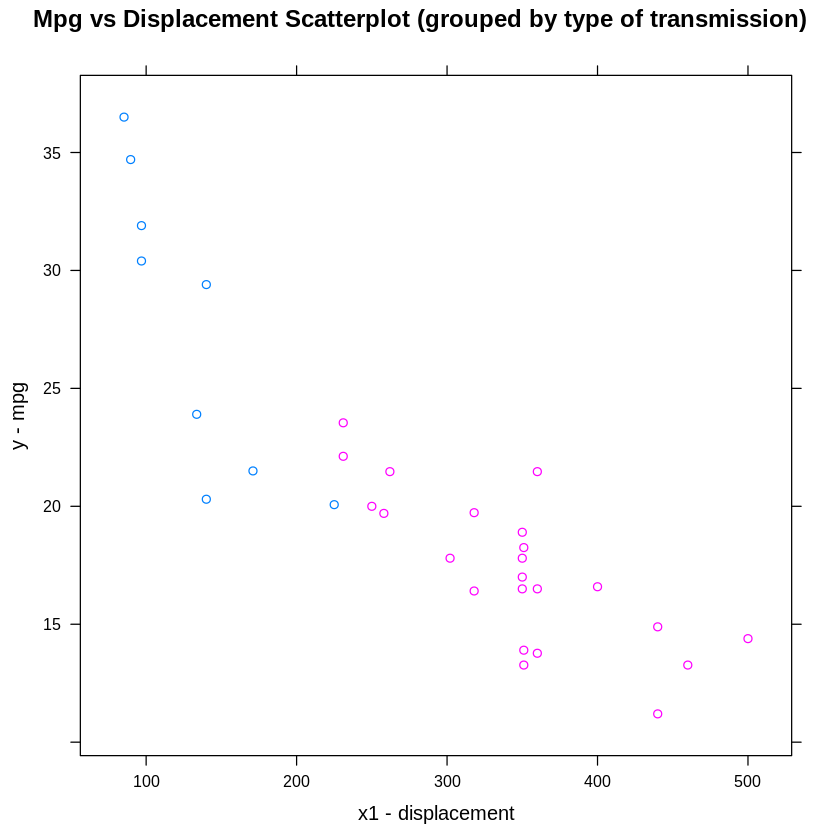

In [40]:
 xyplot(y ~ x1, group=x11,data=table.b3, xlab='x1 - displacement', ylab='y - mpg',main="Mpg vs Displacement Scatterplot (grouped by type of transmission)")

The plot represents that grouping of variables by the type of transmission demonstrates the non-linearity. Thus, the linear model is evidently not reasonable for these data.

- (c) Fit the model relating y to x1 and x11 which gives two lines having possibly different slopes and intercepts. Check the diagnostics. Are there any influential observations? Are there any influential outliers?

In [41]:
table.b3_lm<-lm(y ~ x1+x11,data=table.b3)
summary(table.b3_lm)


Call:
lm(formula = y ~ x1 + x11, data = table.b3)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9153 -1.8882  0.1106  1.7706  6.7829 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.618408   1.539505  21.837  < 2e-16 ***
x1          -0.045736   0.008682  -5.268  1.2e-05 ***
x11         -0.498689   2.228198  -0.224    0.824    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.115 on 29 degrees of freedom
Multiple R-squared:  0.7727,	Adjusted R-squared:  0.757 
F-statistic: 49.28 on 2 and 29 DF,  p-value: 4.696e-10


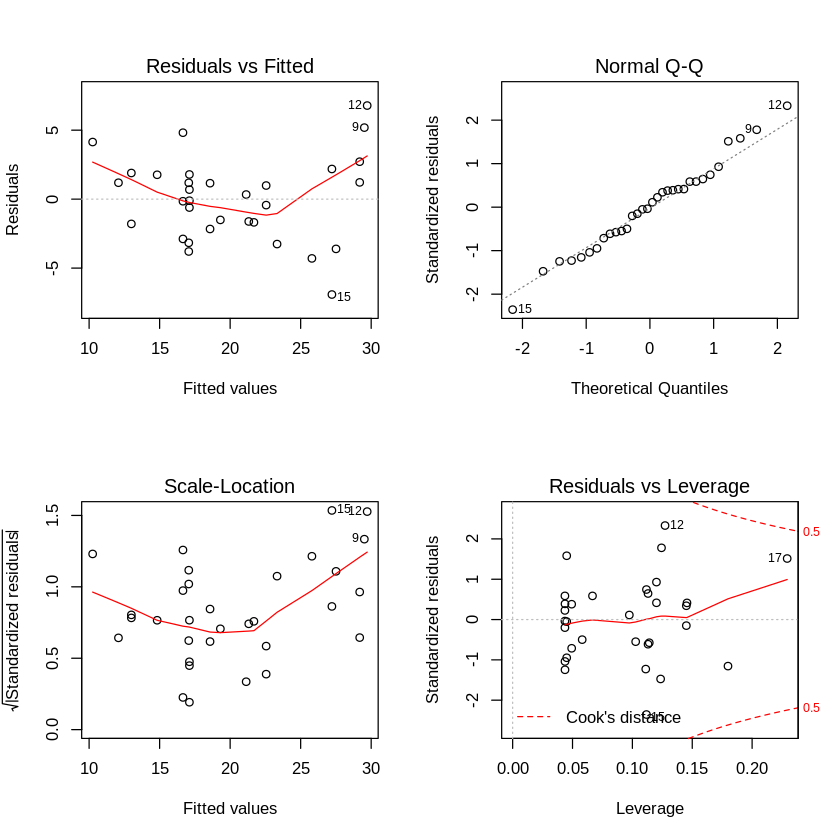

In [42]:
par(mfrow=c(2,2))
plot(table.b3_lm)

The given plots demontsrate that observations 9,12,15 and 17 are influential ones. However, plot "Residuals vs Leverage" shows the all of them are not outliers as all of these cases are within the dashed Cook's distance lines.

- (d) Plot the residuals against the variable x7 (number of transmission speeds), again using x11 as a group variable. Is there anything striking about this plot?

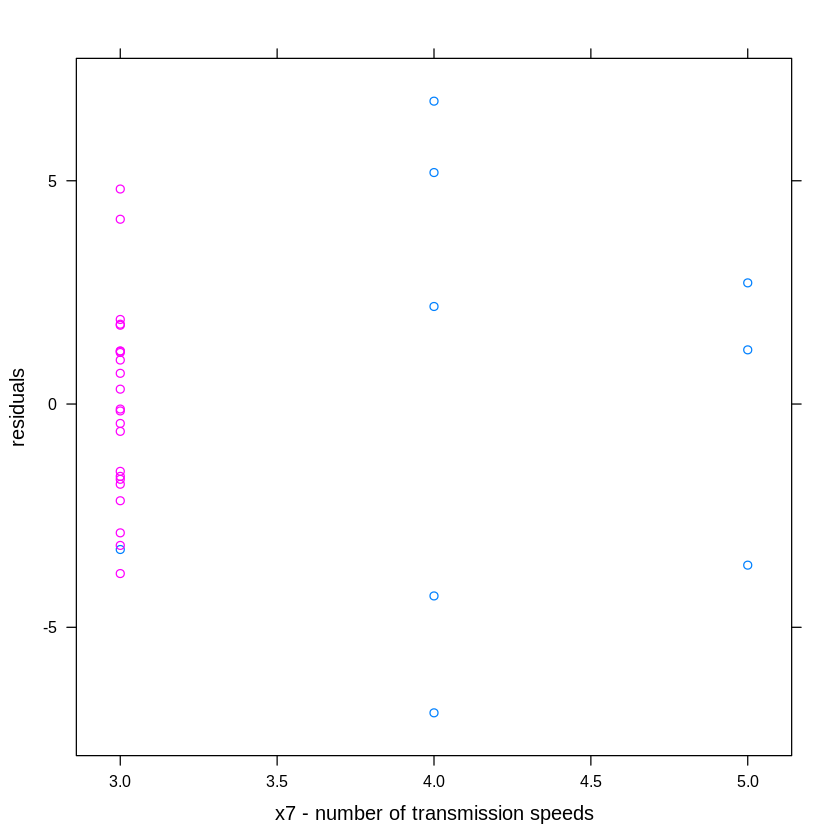

In [43]:
xyplot(table.b3_lm$residuals ~ x7, group=x11,data=table.b3, xlab='x7 - number of transmission speeds', ylab='residuals')

Is it clear to notice the striking feature; then we plot the residuals against the variable x7, all residuals are separated by the three different types of number of transmisson speeds. 

# Chapter 8

# Exercise  1

The following table shows numbers of occasions when inhibition (i.e., no flow of current across a membrane) occurred within 120 s, for different concentrations of the protein peptide-C (data are used with the permission of Claudia Haarmann, who obtained these data in the course of her PhD research). The outcome `yes` implies that inhibition has occurred.
- <b>conc</b> 0.1 0.5 1 10 20 30 50 70 80 100 150 
- <b>no</b> 7 1 10 9 2 9 13 1 1 4 3
- <b>yes</b> 0 0 3 4 0 6 7 0 0 1 7

Use logistic regression to model the probability of inhibition as a function of protein concentration.

In [44]:
conc<-c(0.1 ,0.5 ,1  ,10 ,20 ,30 ,50 ,70 ,80 ,100 ,150)
no  <-c(7   ,1   ,10 ,9  ,2  ,9  ,13 ,1  ,1  ,4   ,3  )
yes <-c(0   ,0   ,3  ,4  ,0  ,6  ,7  ,0  ,0  ,1   ,7  )

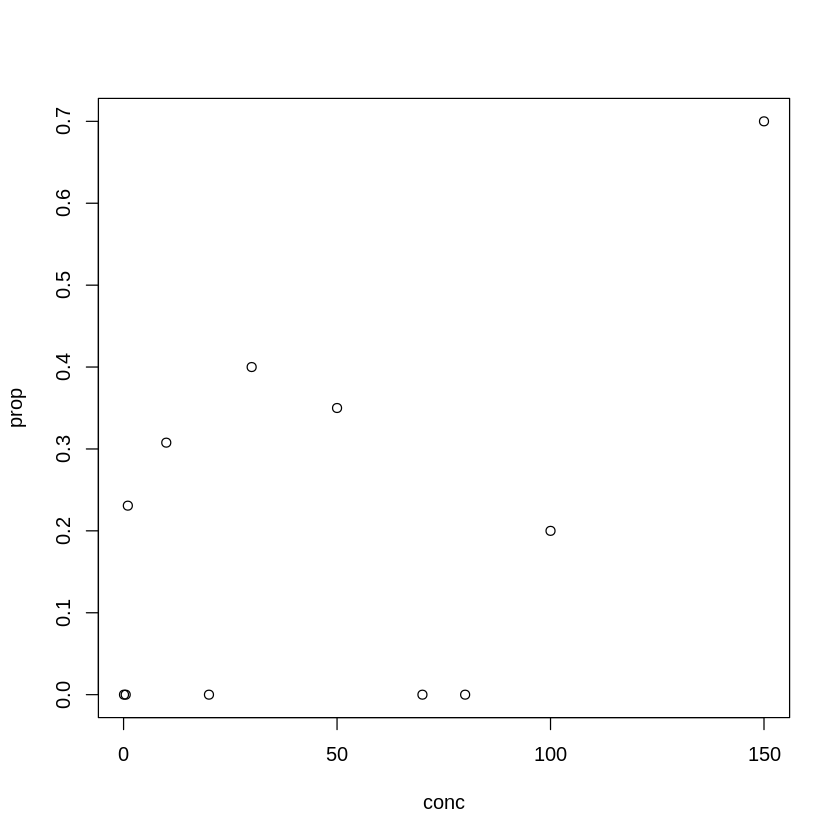

In [45]:
all<-no+yes # total variables of the responses
prop<-yes/all # we took the proportion of the outcome yes, because the propotion increase 
              #when increase the concentration
plot(conc,prop) # Ploting, versus the concentration, of the proportion of patients with occured inhition. 

In [46]:
inhibition_glm<-glm(prop ~ conc, family=binomial, weights=all)
summary(inhibition_glm)


Call:
glm(formula = prop ~ conc, family = binomial, weights = all)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8159  -1.0552  -0.6878   0.3667   1.0315  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.32701    0.33837  -3.922 8.79e-05 ***
conc         0.01215    0.00496   2.450   0.0143 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 16.683  on 10  degrees of freedom
Residual deviance: 10.389  on  9  degrees of freedom
AIC: 30.988

Number of Fisher Scoring iterations: 4


Each one-unit of increasing the ```conc``` leads to the log odds increase of ```prob``` by 0.012 and p-value indicates that it is significant. Thus, it is reasonable to use it to model the probability of inhibition as a function of protein concentration.

# Exercise  2

In the data set (an artificial one of 3121 patients, that is similar to a subset of the data analyzed in Stiell et al., 2001) minor.head.injury, obtain a logistic regression model relating clinically.important.brain.injury to other variables. Patients whose risk is sufficiently high will be sent for CT (computed tomography). Using a risk threshold of 0.025 (2.5%), turn the result into a decision rule for use of CT.

In [47]:
head (head.injury)
range(head.injury) 

age.65,amnesia.before,basal.skull.fracture,GCS.decrease,GCS.13,GCS.15.2hours,high.risk,loss.of.consciousness,open.skull.fracture,vomiting,clinically.important.brain.injury
0,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0


[1] 0 1

In [48]:
# predicting the patients with high risk; 250/(2871+250) is the baseline model

table(head.injury$clinically.important.brain.injury)


   0    1 
2871  250 

In [49]:
#Since we have only one data set, we randomly split our data set into a training set and testing set

smp_size <- floor(0.75 * nrow(head.injury)) # 75% of the sample size

set.seed(123)
head.injury_train<- sample(seq_len(nrow(head.injury)), size = smp_size)

train <- head.injury[head.injury_train, ]
test <- head.injury[-head.injury_train, ]

nrow(train)
nrow(test)

[1] 2340

[1] 781

In [50]:
#builing the model on train dataset

injury.glm<- glm(clinically.important.brain.injury ~ .,data=train, family=binomial) 
summary(injury.glm)


Call:
glm(formula = clinically.important.brain.injury ~ ., family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1509  -0.3450  -0.2172  -0.1589   2.9593  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -4.3661     0.1810 -24.116  < 2e-16 ***
age.65                  1.3585     0.2091   6.498 8.14e-11 ***
amnesia.before          0.6312     0.1955   3.228  0.00125 ** 
basal.skull.fracture    1.8502     0.2362   7.834 4.74e-15 ***
GCS.decrease           -0.6225     0.4128  -1.508  0.13156    
GCS.13                  1.0040     0.3147   3.191  0.00142 ** 
GCS.15.2hours           2.0143     0.1885  10.684  < 2e-16 ***
high.risk               1.0409     0.1795   5.798 6.72e-09 ***
loss.of.consciousness   0.9435     0.2230   4.231 2.33e-05 ***
open.skull.fracture     0.5073     0.3893   1.303  0.19258    
vomiting                1.1054     0.2239   4.936 7.97e-07 ***
---
Signif. codes

From the table above we see that almost all coefficients for variables are positive, which means that the increase in these variables leads to the higher risk. It is noticable that mostly all variables are significant in our model (there are at least two starts). We remain just significant varibles in our model.

In [51]:
#model with significant variables 
injury.glm2<- glm(clinically.important.brain.injury ~ age.65+amnesia.before+basal.skull.fracture+GCS.13+GCS.15.2hours+high.risk+loss.of.consciousness+vomiting ,data=train, family=binomial) 
summary(injury.glm2)


Call:
glm(formula = clinically.important.brain.injury ~ age.65 + amnesia.before + 
    basal.skull.fracture + GCS.13 + GCS.15.2hours + high.risk + 
    loss.of.consciousness + vomiting, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2927  -0.3485  -0.2208  -0.1617   2.9474  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -4.3305     0.1790 -24.192  < 2e-16 ***
age.65                  1.3320     0.2067   6.446 1.15e-10 ***
amnesia.before          0.6283     0.1951   3.221  0.00128 ** 
basal.skull.fracture    1.7755     0.2303   7.709 1.27e-14 ***
GCS.13                  0.9885     0.3161   3.127  0.00176 ** 
GCS.15.2hours           1.9822     0.1862  10.648  < 2e-16 ***
high.risk               1.0214     0.1783   5.729 1.01e-08 ***
loss.of.consciousness   0.9313     0.2227   4.182 2.89e-05 ***
vomiting                1.1049     0.2223   4.971 6.66e-07 ***
---
Signif. codes:  0

In [52]:
injury_predict_train=predict(injury.glm2,type="response")
summary(injury_predict_train)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01299 0.01299 0.03232 0.08162 0.08488 0.96992 

In [53]:
injury_predict_test=predict(injury.glm2,type="response", newdata = test)
summary(injury_predict_test)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01299 0.01299 0.03232 0.07961 0.08488 0.96762 

For the use of CT we have to use the threshold of 0.025. A the output of the logit model is a probabily, we can select our threshold value to the given one. The confusion matrix is used to show the quantitative result.

In [54]:
#Confusion matrix for the threshold of 0.5
table(Observed=test$clinically.important.brain.injury, Predicted=injury_predict_test > 0.50)

        Predicted
Observed FALSE TRUE
       0   716    6
       1    40   19

In [55]:
#Sensitivity
cat("Sensitivity: ", 19/59,'\n')

#Specificity
cat("Specificity: ",716/722)

Sensitivity:  0.3220339 
Specificity:  0.9916898

In [56]:
#Confusion matrix for the threshold of 0.1
table(Observed=test$clinically.important.brain.injury, Predicted=injury_predict_test > 0.1)

        Predicted
Observed FALSE TRUE
       0   643   79
       1    13   46

In [57]:
#Sensitivity
cat("Sensitivity: ", 46/59,'\n')

#Specificity
cat("Specificity: ",623/(623+79))

Sensitivity:  0.779661 
Specificity:  0.8874644

In [58]:
#Confusion matrix for the threshold of 0.025
table(Observed=test$clinically.important.brain.injury,Predicted= injury_predict_test > 0.025)

        Predicted
Observed FALSE TRUE
       0   363  359
       1     3   56

In [59]:
#Sensitivity
cat("Sensitivity: ", 56/59,'\n')

#Specificity
cat("Specificity: ",363/(363+359))

Sensitivity:  0.9491525 
Specificity:  0.5027701

We can notice that when the threshold value decreases from 0.5 to 0.025, the model's sensitivity increases and the specificity decreases. It is reasonable in our case, because with high sensitivity we rise up the probability of identifying patients with high risk and send them to CT.

# Exercise  5

Use the function ```logisticsim()``` (in the DAAG package) to simulate data from a logistic regression model to study the ```glm()``` function. For example, you might try experiments such as the following:

 - (a) Simulate 100 observations from the model logit(x) = 2 − 4x, for x = 0, 0.01, 0.02, . . . , 1.0. 

First, we start from plotting, versus the concentration, of proportion of no-inhibition outcome. We take the response as no-inhibition  Thus, the plot below shows the proportion of no 

In [60]:
x = seq(0, 1, length=101)
sim = logisticsim(x=x, a=2, b=-4, seed=NULL)

- (b) Plot the responses (y) against the “dose” (x). Note how the pattern of 0s and 1s changes as
x increases.

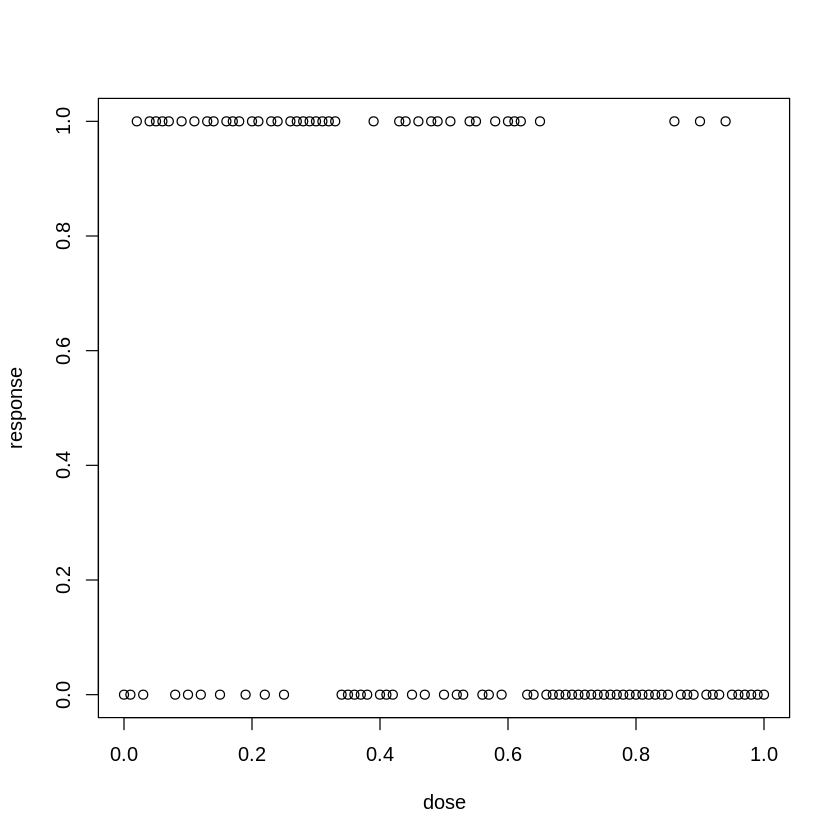

In [61]:
plot(sim, xlab='dose', ylab='response')

- (c) Fit the logistic regression model to the simulated data, using the binomial family. Compare the estimated coefficients with the true coefficients. Are the estimated coefficients
within about 2 standard errors of the truth?

In [62]:
model <- glm(y ~ x, family=binomial, data=sim)
summary(model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.173238,0.439020,2.672402,7.531035e-03
x,-3.271642,0.836635,-3.910477,9.211408e-05


As we can see with the estimated coefficients lie within the 2 standard error interval.

- (d) Compare the estimated logit function with the true logit function. How well do you think
the fitted logistic model would predict future observations? For a concrete indication of the difference, simulate a new set of 100 observations at the same x values, using a specified pseudorandom number generator seed and the true model. Then simulate some predicted observations using the estimated model and the same seed.

In [63]:
sim = logisticsim(x=x, a=2, b=-4, seed=420) #true model sim
model <- glm(y ~ x, family=binomial (link='logit'), data=sim)
summary(model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.958786,0.4957741,3.950966,7.783653e-05
x,-4.075667,0.8949771,-4.553935,5.265168e-06


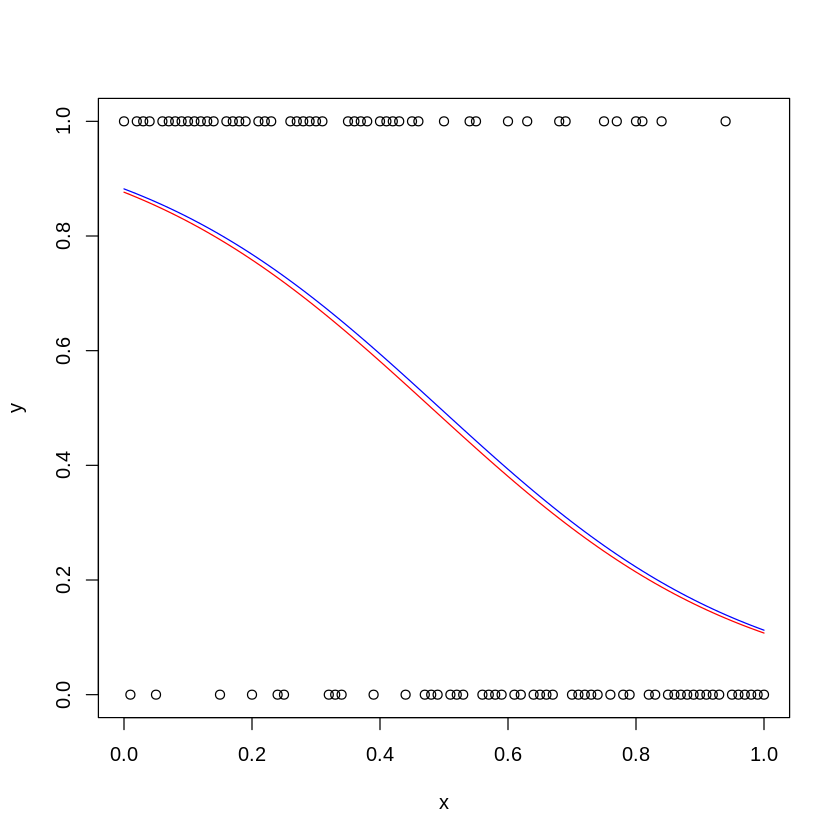

In [64]:
sim2 = logisticsim(x=x, a=1.942627, b=-3.990671, seed=420) #estimated model sim
model2 = glm(y ~ x, family=binomial (link='logit'), data=sim2)
y = predict(model, type='response')
y2 =predict(model2, type='response')
plot(sim)
lines(x, y, col='red') #true
lines(x, y2, col='blue') #estimated


As we can see, the estimated logit (blue) is almost the same as our true logit (red). This result suggest that our fitted model should predict correctly future observations.

# Exercise  6

As in the previous exercise, the function ```poissonsim()``` allows for experimentation with Poisson regression. In particular, ```poissonsim()``` can be used to simulate Poisson responses with log-rates equal to a + bx, where a and b are fixed values by default.

- (a) Simulate 100 Poisson responses using the model log λ = 2 − 4x, for x = 0, 0.01, 0.02 . . . , 1.0. Fit a Poisson regression model to these data, and compare the estimated coefficients with the true coefficients. How well does the estimated model predict future observations?

In [65]:
x = seq(0, 1, length=100)
sim = poissonsim(x=x, a=2, b=-4, seed=420)
model <- glm(y ~ x, family=poisson, data=sim)
summary(model)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.029213,0.1091582,18.58965,3.897233e-77
x,-4.213536,0.3661760,-11.50686,1.218351e-30


As we can see, the estimated coefficients are close to the true ones.

- (b) Simulate 100 Poisson responses using the model log λ = 2 − bx, where b is normally distributed with mean 4 and standard deviation 5. [Use the argument slope.sd=5 in the ```poissonsim()``` function.] How do the results using the poisson and quasipoisson families differ?

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.039337,0.1276248,15.979158,4.820913e-29
x,-4.338666,0.4370212,-9.927815,1.735995e-16


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.039337,0.1096922,18.59145,3.768242e-77
x,-4.338666,0.3756151,-11.55083,7.311181e-31


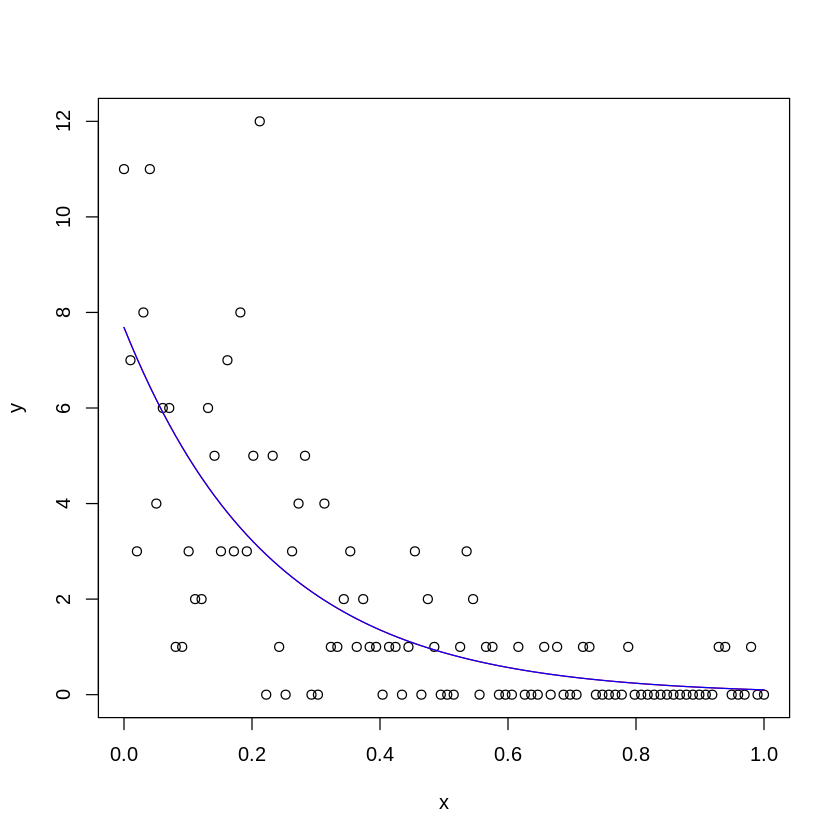

In [66]:
set.seed(420)
b = rnorm(100, 4, 5)
sim2 = poissonsim(x=x, a=2, b=-b, slope.sd=5, seed=420)
model2 <- glm(y ~ x, family=quasipoisson, data=sim2)
model3 <- glm(y ~ x, family=poisson, data=sim2)
summary(model2)$coef
summary(model3)$coef
plot(sim2)
y = predict(model3, type='response')
y2 =predict(model2, type='response')
lines(x, y, col='red')
lines(x, y2, col='blue')



The results obtained shows the same coefficients for the poisson and quasipoisson models. There are only non significant differences in the standard error and t_values.